# **Exploratory Data Analysis - Python**

I conducted Exploratory Data Analysis (EDA) on the cleaned dataset using Python to explore distributions and relationships across multiple variables. Using visualization libraries like Matplotlib and Seaborn, I created bar, grouped and stacked bar charts, histograms, and pie charts to identify trends and insights outside of the data about the technologies.

## Repository

Check out the repository on [GitHub](https://github.com/FaiLuReH3Ro/exploritory-da-py) for more details.

## Dataset Used

I am going to use the [clean survey data](/kaggle/input/stack-overflow-survey-2024-cleaned-data/clean_survey_data.csv) file I exported at the end of the [data wrangling](https://www.kaggle.com/code/failureh3ro/data-wrangling-python) process.

## Objectives 

* Load the clean dataset into a dataframe
* Explore distributions across multiple variables
* Visualize and provide an analysis

## Download and Import Libraries

In [1]:
'''Run this cell if the libraries are not installed'''
# Uncomment the lines below to install
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install numpy

'Run this cell if the libraries are not installed'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random

# Suppress warnings
# Comment before running to view warnings
import warnings
warnings.filterwarnings("ignore")

## Load the Data

> Note: If running this notebook locally, place the `clean_survey_data.csv` file in the same directory or folder as this Jupyter notebook

In [3]:
'''Use the top file if running locally'''
#file = 'clean_survey_data.csv'
file = '/kaggle/input/stack-overflow-survey-2024-cleaned-data/clean_survey_data.csv'

# Read the file to a dataframe
df = pd.read_csv(file)

In [4]:
# Set display options for rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Preview the file
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCode_MinMax,YearsCodePro,ExperienceLevel,YearsCodePro_Zscore,DevType,Country,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,WorkExp,ConvertedCompYearly,JobSat
0,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",20,0.40,17,Architect,0.812509,"Developer, full-stack",United Kingdom of Great Britain and Northern I...,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,17.0,NaN,NaN
1,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",37,0.74,27,Architect,2.010883,Developer Experience,United Kingdom of Great Britain and Northern I...,NaN,C#,C#,Firebase Realtime Database,Firebase Realtime Database,Google Cloud,Google Cloud,ASP.NET CORE,ASP.NET CORE,MSBuild,MSBuild,Visual Studio,Visual Studio,NaN,NaN,NaN
2,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Some college/university study without earning ...,4,0.08,10,Lead,-0.026352,"Developer, full-stack",Canada,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...,MongoDB;MySQL;PostgreSQL;SQLite,MongoDB;MySQL;PostgreSQL,Amazon Web Services (AWS);Fly.io;Heroku,Amazon Web Services (AWS);Vercel,jQuery;Next.js;Node.js;React;WordPress,jQuery;Next.js;Node.js;React,Docker;npm;Pip,Docker;Kubernetes;npm,NaN,NaN,NaN,NaN,NaN
3,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",9,0.18,10,Lead,-0.026352,"Developer, full-stack",Norway,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,C++;HTML/CSS;JavaScript;Lua;Python,PostgreSQL;SQLite,PostgreSQL;SQLite,NaN,NaN,NaN,NaN,APT;Make;npm,APT;Make,Vim,Vim,NaN,NaN,NaN
4,6,I code primarily as a hobby,Under 18 years old,"Student, full-time","Hybrid (some remote, some in-person)",Primary/elementary school,10,0.20,10,Lead,-0.026352,Student,United States of America,NaN,Bash/Shell (all shells);HTML/CSS;Java;JavaScri...,Bash/Shell (all shells);HTML/CSS;Java;JavaScri...,Cloud Firestore,Cloud Firestore,Cloudflare,Cloudflare,Node.js,Node.js,Docker;Homebrew;npm;Pip;pnpm,Homebrew;npm;Pip;pnpm,Nano;Vim;Visual Studio Code;Xcode,Nano;Vim;Visual Studio Code;Xcode,NaN,NaN,NaN


## Analyze Experience and Job Satisfaction

I am going to analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). To do that, I will group the years into ranges and calculate the median job satisfaction for each range. Finally, I will visualize the results with a bar plot. 

Since the `JobSat` column has many missing values (over 50%), I will just drop the all the rows where `JobSat` had NaN values and store the result in a new dataframe. 

In [5]:
# Drop the NaN rows and store in a new df
df_exp_sat = df[['YearsCodePro', 'JobSat']].dropna(ignore_index=True)

# Create the ranges and labels
ranges = [0, 5, 10, 20, 100]
range_labels = ['0-5', '5-10', '10-20', '20+']

# Create a new column with the range values
df_exp_sat['YearsCodeProRange'] = pd.cut(df_exp_sat['YearsCodePro'], bins = ranges, labels = range_labels, include_lowest=True)

df_exp_sat[['YearsCodePro','YearsCodeProRange']].head()

,YearsCodePro,YearsCodeProRange
0,10,5-10
1,12,10-20
2,27,20+
3,10,5-10
4,0,0-5


In [6]:
# Calculating the median JobSat for each range
df_ProRanges = df_exp_sat.groupby('YearsCodeProRange')['JobSat'].median().reset_index()

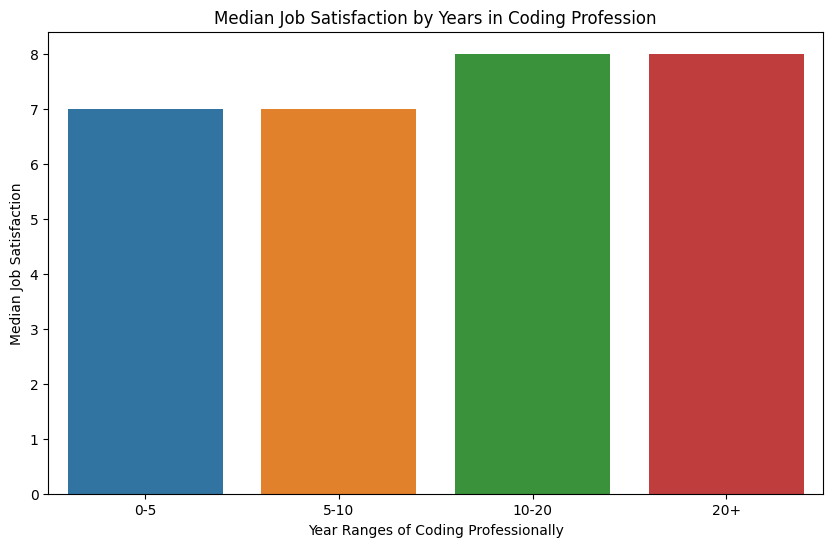

In [7]:
# Create a bar plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(df_ProRanges, x = 'YearsCodeProRange', y = 'JobSat', hue = 'YearsCodeProRange', dodge = False)
plt.xlabel("Year Ranges of Coding Professionally")
plt.ylabel("Median Job Satisfaction")
plt.title("Median Job Satisfaction by Years in Coding Profession")
plt.legend().remove()
plt.show()

The median job satisfaction for all the year ranges are very close to each other. In fact, the two lower ranges both have a median job satisfaction of 7 and the two higher ranges are 8. The median slightly increased as the years coding professionally increased. 

## Job Satisfaction Distribution

To get an idea of the general job satisfaction levels (`JobSat`) of the survey respondents, I will use a countplot to display the distribution.

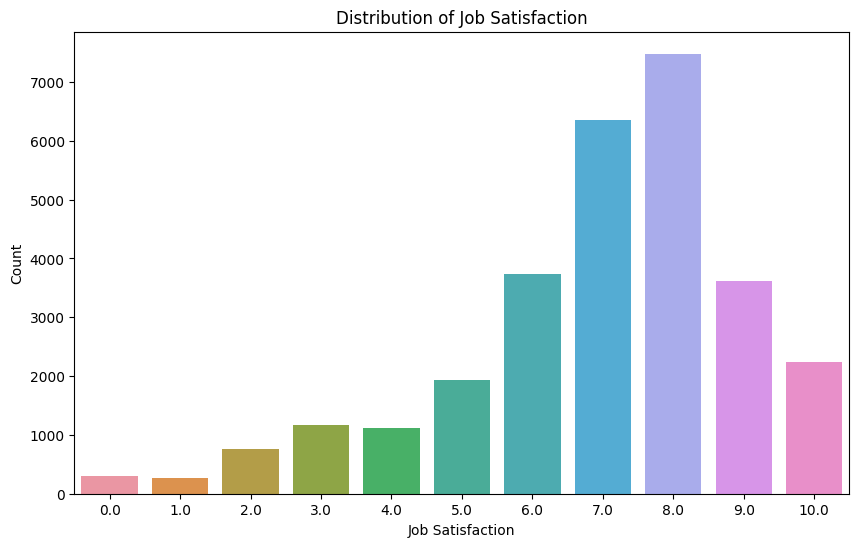

In [8]:
# Plot the countplot
# Can use the previous filtered df 
plt.figure(figsize=(10, 6))
sns.countplot(df_exp_sat, x= 'JobSat', hue = 'JobSat', dodge = False)
plt.title("Distribution of Job Satisfaction")
plt.xlabel("Job Satisfaction")
plt.ylabel("Count")
plt.legend().remove()
plt.show()

Based on the the graph, it seems like the majority of the survey participants are satisfied with their jobs. I am basing satisfaction levels 6 as being somewhat satisfied and 10 to be fully satisfied. The highest levels are 7 and 8. This is generally understandable since no job is going to be perfect.

## Analyze Work Type by Dev Type

Many developer roles are remote because many of the work can be done with a computer. To find the distribution of remote work (`RemoteWork`) by developer types (`DevType`), I will use a horizontal bar chart to visualize. I can also cross tabulate the two columns to create a table of the relationship. 

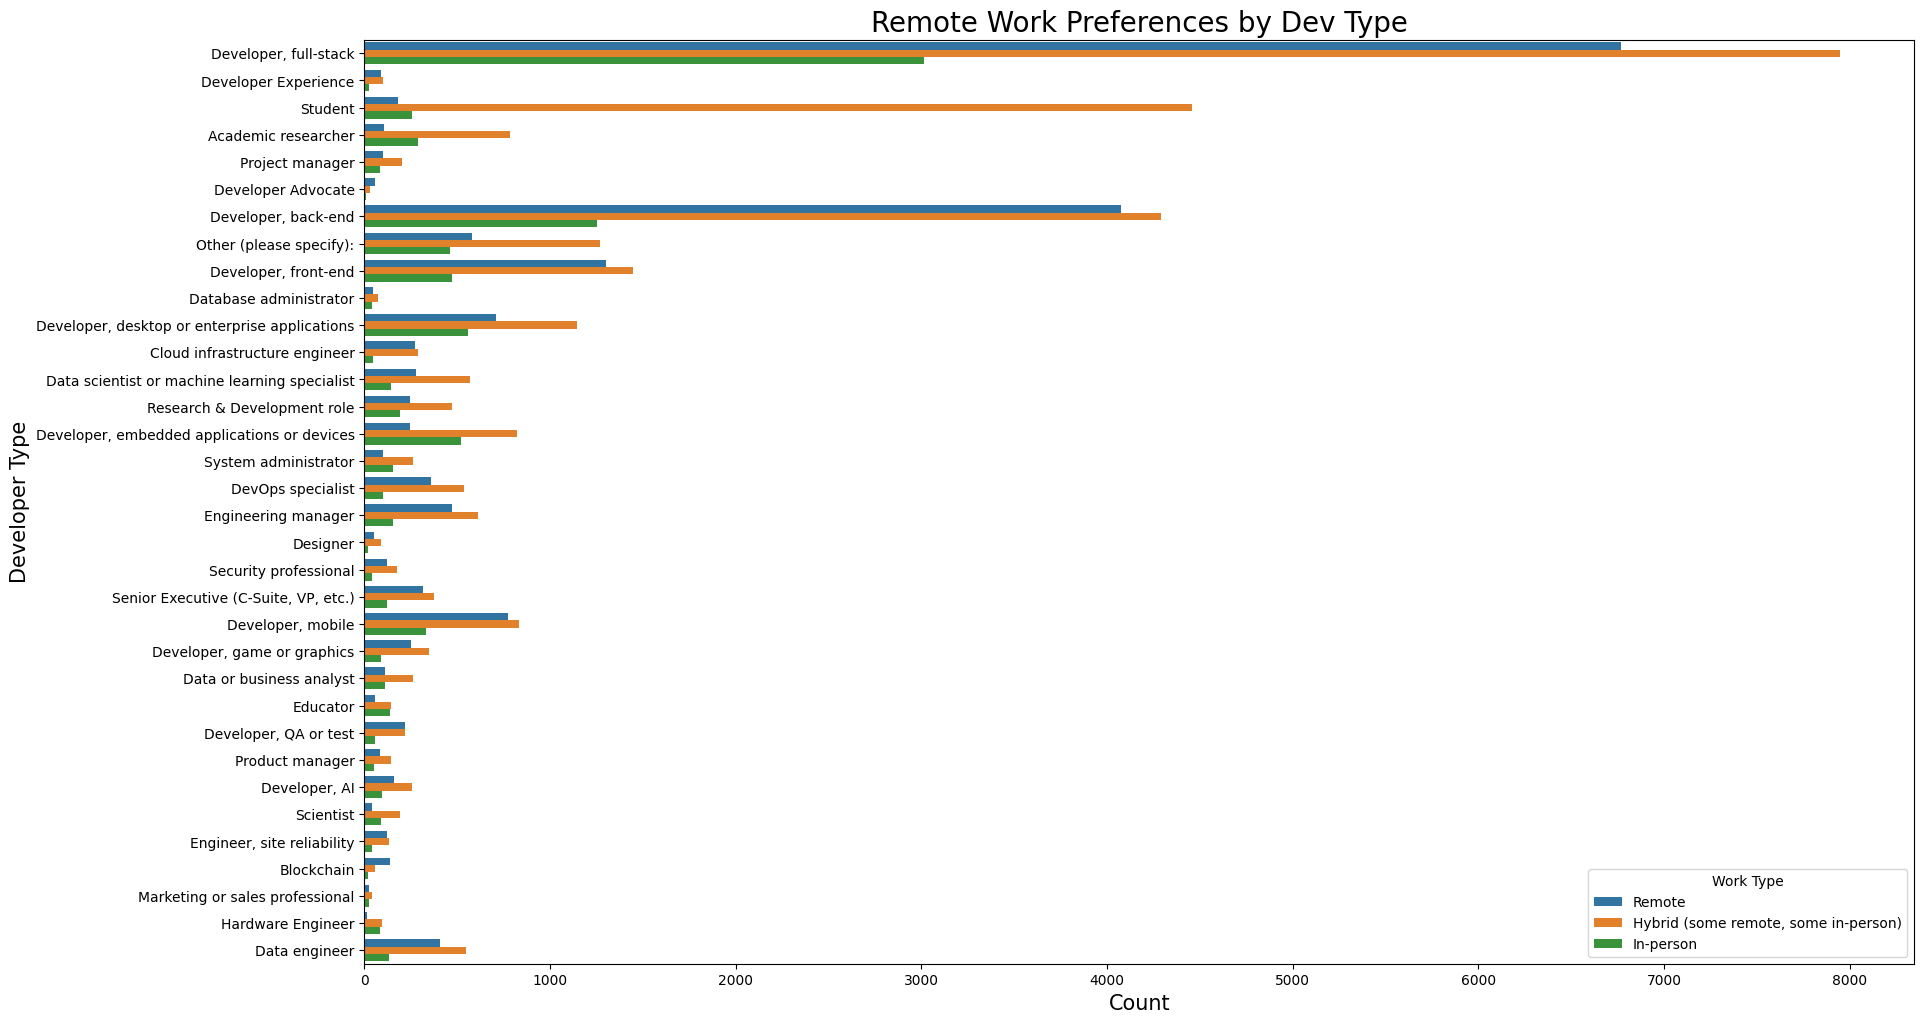

In [9]:
# Plot the count plot
plt.figure(figsize=(20, 12))
sns.countplot(df, y = 'DevType', hue = 'RemoteWork')
plt.title("Remote Work Preferences by Dev Type", fontsize = 20)
plt.xlabel("Count", fontsize = 15)
plt.ylabel("Developer Type", fontsize = 15)
plt.legend(loc='best', title='Work Type')
plt.show()

The bars are very small and tight since there is a vast quantity of developer types. However, it is still slightly good enough to tell the difference between the work types. It seems like most developer types work in a hybrid setting. In-person developers appears to be the least in this survey.

In [10]:
# Cross tabulation table
cross_tab = pd.crosstab(df['RemoteWork'], df['DevType'])
cross_tab

DevType,Academic researcher,Blockchain,Cloud infrastructure engineer,Data engineer,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,Developer Advocate,Developer Experience,"Developer, AI","Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices","Developer, front-end","Developer, full-stack","Developer, game or graphics","Developer, mobile",Educator,"Engineer, site reliability",Engineering manager,Hardware Engineer,Marketing or sales professional,Other (please specify):,Product manager,Project manager,Research & Development role,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
RemoteWork,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Hybrid (some remote, some in-person)",786,60,288,547,264,568,73,92,535,33,103,255,221,4291,1146,823,1449,7951,346,836,146,135,614,98,39,1271,143,205,472,190,176,374,4459,264
In-person,289,22,49,131,113,146,40,22,100,9,25,93,58,1254,561,521,471,3015,92,335,136,41,154,83,25,462,52,87,192,90,43,122,258,153
Remote,107,140,272,408,114,276,45,55,358,60,88,159,218,4075,712,247,1300,6771,250,775,60,124,473,12,24,582,84,101,245,41,121,317,183,101


## Work Type by Country Distribution

The earlier visualization indicated that the majority of developers across all types generally work hybrid. Let's see if this trends continues in the distribution of `RemoteWork` by `Country`. Since there are many countries in the dataset, I will only sample the top 10 countries with the most responses. 

In [11]:
# Create a series for the 10 top countries with the highest participants
df_top10_countries = df['Country'].value_counts().sort_values(ascending=False).head(10)

# Create a dataframe grouping Country and RemoteWork 
# Aggregate the counts for each category
df_RemoteByCountry = df.groupby(['Country', 'RemoteWork'])['ResponseId'].count().reset_index()

# Create a filter for the top 10 countries
filter = df_top10_countries.index.to_list()

# Filter out the dataframe by showing only the top 10 countries
df_RemoteByCountry = df_RemoteByCountry[df_RemoteByCountry['Country'].isin(filter)]

# Replace the long names for better readability
df_RemoteByCountry['Country'] = df_RemoteByCountry['Country'].replace({'United States of America': 'USA', 'United Kingdom of Great Britain and Northern Ireland': 'UK'})

In [12]:
# Show the top 10 countries
df_top10_countries

Country
United States of America                                10869
Germany                                                  4883
India                                                    4058
United Kingdom of Great Britain and Northern Ireland     3174
Ukraine                                                  2632
France                                                   2092
Canada                                                   2056
Poland                                                   1517
Netherlands                                              1428
Brazil                                                   1340
Name: count, dtype: int64

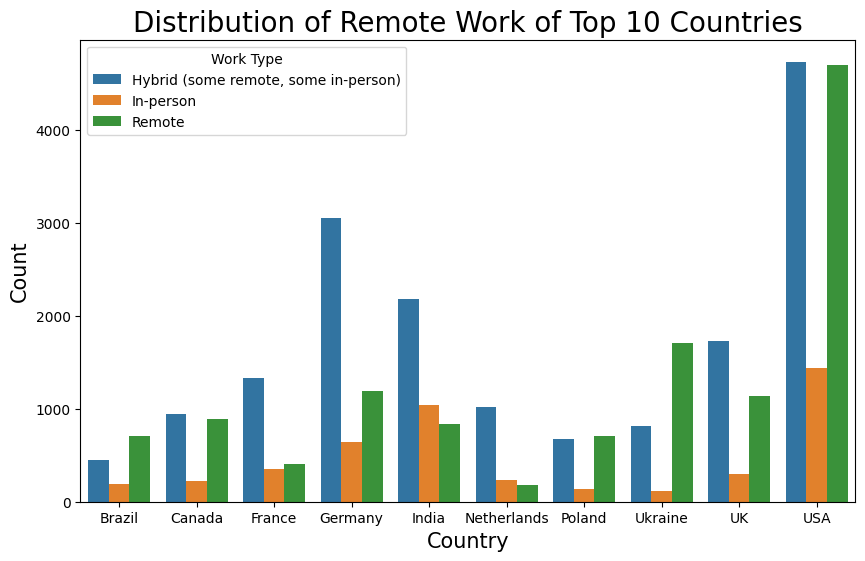

In [13]:
# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(df_RemoteByCountry, x = 'Country', y= 'ResponseId', hue='RemoteWork')
plt.xlabel("Country", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.legend(title = 'Work Type')
plt.title("Distribution of Remote Work of Top 10 Countries", fontsize = 20)
plt.show()

This graph generally shows that hybrid work is the most across the top 10 countries. However, there are some notable exceptions. Brazil, Poland, and Ukraine has more remote developers in the survey. The distribution of remote and hybrid in the USA is actually very close. 

## Distribution of Respondents by Country

Since we now know the top 10 countries represented in the survey, let's visualize the distribution to get a better understanding.

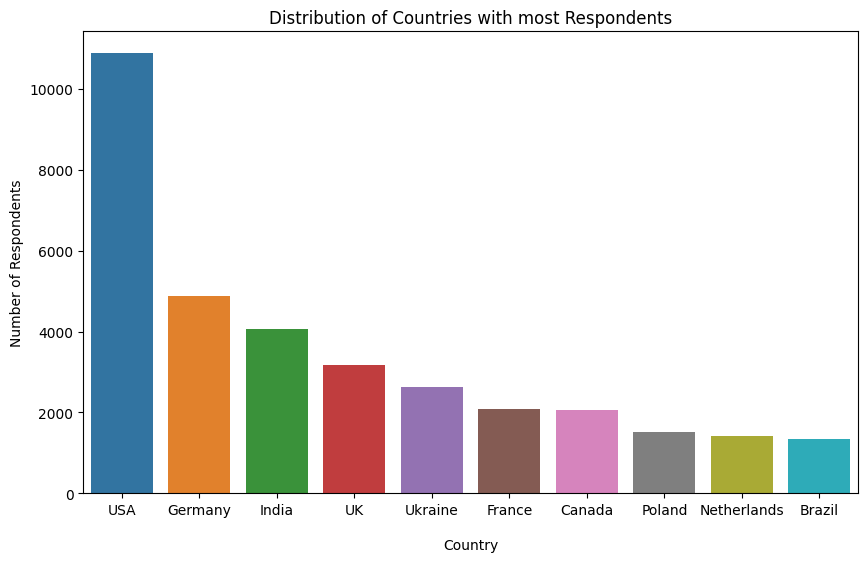

In [14]:
# Replace the long names with abbreviations
df_top10_countries = df_top10_countries.reset_index()
df_top10_countries['Country'] = df_top10_countries['Country'].replace({'United States of America': 'USA', 'United Kingdom of Great Britain and Northern Ireland': 'UK'})

# Plot the bar plot
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(df_top10_countries, x='Country', y='count', hue='Country', dodge = False)
ax.set_title("Distribution of Countries with most Respondents")
ax.set_xlabel("Country", labelpad=15)
ax.set_ylabel("Number of Respondents")
ax.get_legend().remove()
plt.show()

Most respondents in the survey are by far from the USA. The USA has more then double the amount than the second highest country, Germany. The majority of countries in the top 10 are from Europe. 

## Distribution of Age

The data set includes ages in a categorical age range (`Age`). This does make things more difficult if we want to visualize the distribution with a histogram. However, I can work my way around it by assigning a random age between a range. This will not be 100% accurate but it still can reflect the dataset since in some capacity.  

In [15]:
# Function provide a random age between the age ranges
# Ages below 18 and above 65 would have a reasonable range
def randAge(data):
    if '18-24' in data:
        return random.randint(18, 25)
    elif '25-34' in data:
        return random.randint(25, 35)
    elif '35-44' in data:
        return random.randint(35, 45)
    elif '45-54' in data:
        return random.randint(45, 55)
    elif '55-64' in data:
        return random.randint(55, 65)
    elif '65' in data:
        return random.randint(65, 80)
    elif 'Under' in data:
        return random.randint(13, 18)
    else:
        return None

In [16]:
# Create a new column to store the ages
# Apply the function to the Age column
df['Age_Num'] = df['Age'].apply(randAge)
df[['Age', 'Age_Num']].head()

,Age,Age_Num
0,35-44 years old,39.0
1,45-54 years old,50.0
2,18-24 years old,23.0
3,18-24 years old,19.0
4,Under 18 years old,17.0


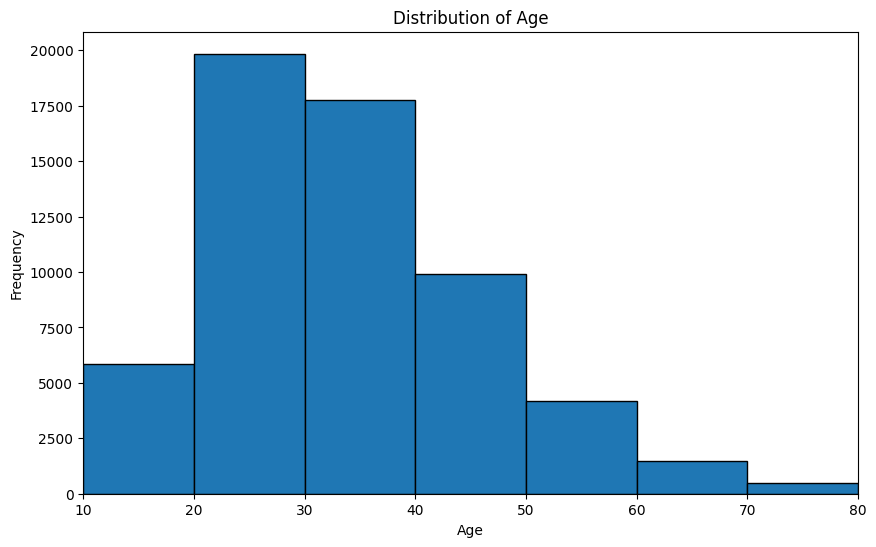

In [17]:
# Plot the histogram
fig, ax = plt.subplots(figsize=(10,6))
bins = [10, 20, 30, 40, 50, 60 ,70 ,80]
ax.hist(df['Age_Num'].dropna(), edgecolor='black', bins=bins)
ax.set_title("Distribution of Age")
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.set_xlim(left=10, right=80)
plt.show()

The histogram indicates that most people who participated in this survey are in their 20s or 30s. Unsurprisingly, participants in their 60s and 70s were the least in the survey.

## Distribution of Coder Type

Respondents of the survey are probably not only developers. Let's explore to see the distribution of developers and non developers (`MainBranch`). 

In [18]:
# Find the counts of each role
branch_counts = df['MainBranch'].value_counts()
branch_counts

MainBranch
I am a developer by profession                                                           46236
I am not primarily a developer, but I write code sometimes as part of my work/studies     5956
I am learning to code                                                                     3163
I code primarily as a hobby                                                               3050
I used to be a developer by profession, but no longer am                                  1340
Name: count, dtype: int64

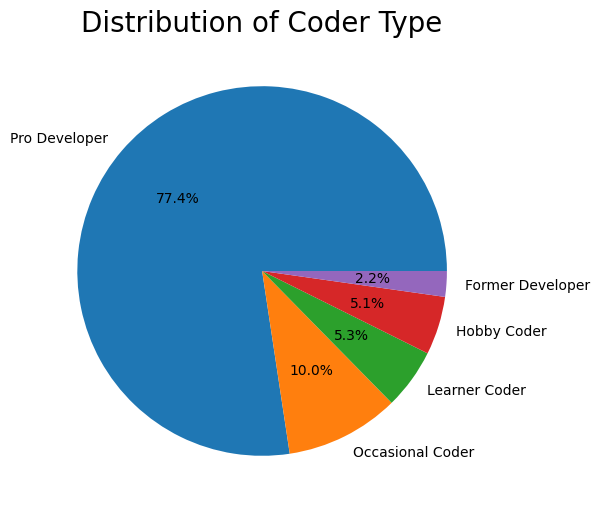

In [19]:
# Plot the pie chart
labels = ['Pro Developer', 'Occasional Coder', 'Learner Coder', 'Hobby Coder','Former Developer']
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(branch_counts.values, labels =labels, autopct='%1.1f%%', startangle=0)
ax.set_title("Distribution of Coder Type", fontsize=20)
plt.show()

The pie chart clearly indicates that most participants in the survey are pro developers. This is nice to know since we'll be getting data from many experts. 

## Distribution of Years Coding Professionally

Let's explore how years of coding professionally (`YearsCodePro`) is distributed across the survey participants.

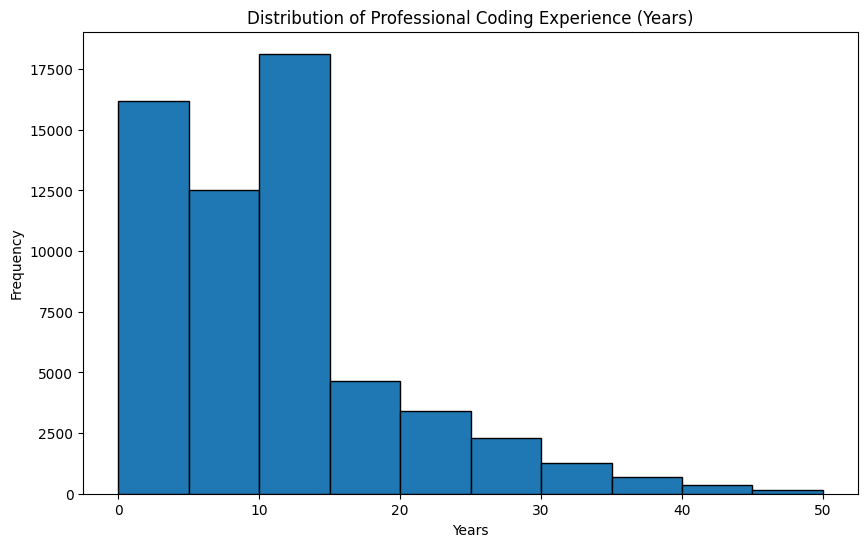

In [20]:
# Plot the histogram
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df['YearsCodePro'], edgecolor='black')
ax.set_title("Distribution of Professional Coding Experience (Years)")
ax.set_ylabel("Frequency")
ax.set_xlabel("Years")
plt.show()

The histogram generally follows a downward trend. As years increase, the frequency decreases. There is an exception with the third bin, which is the highest. The plot also indicates that most participants have 0-15 years of professionally coding experience. 

## Analyze Education and Employment Type

I will analyze education (`EdLevel`) and employment type (`Employment`) to determine if there is a connection. 

Since many cells in the `Employment` columns contain multiple values separated by a semicolon, I will have to split the values into an array and explode the column.  

In [21]:
# Store the target columns in a new df
df_Employ_Ed = df[['Employment', 'EdLevel']]

# Split the values
df_Employ_Ed['Employment'] = df_Employ_Ed['Employment'].str.split(";")

# Explode the column
df_Employ_Ed = df_Employ_Ed.explode('Employment')

In [22]:
# Perform a cross tabulation for better organization
Employ_Ed_crossT = pd.crosstab(df_Employ_Ed['Employment'], df_Employ_Ed['EdLevel'])
Employ_Ed_crossT

EdLevel,"Associate degree (A.A., A.S., etc.)","Bachelor's degree (B.A., B.S., B.Eng., etc.)","Master's degree (M.A., M.S., M.Eng., MBA, etc.)",Primary/elementary school,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree,Something else
Employment,,,,,,,,
"Employed, full-time",1209,19313,12019,188,2222,1778,4326,412
"Employed, part-time",128,1371,719,74,140,596,632,61
I prefer not to say,8,110,48,48,24,84,47,67
"Independent contractor, freelancer, or self-employed",312,3844,2589,151,467,873,1577,130
"Not employed, and not looking for work",20,256,106,155,22,329,164,37
"Not employed, but looking for work",123,1558,532,108,82,492,592,78
Retired,22,198,137,10,107,20,93,12
"Student, full-time",186,2230,556,562,80,2593,1431,151
"Student, part-time",91,875,327,89,42,394,485,63


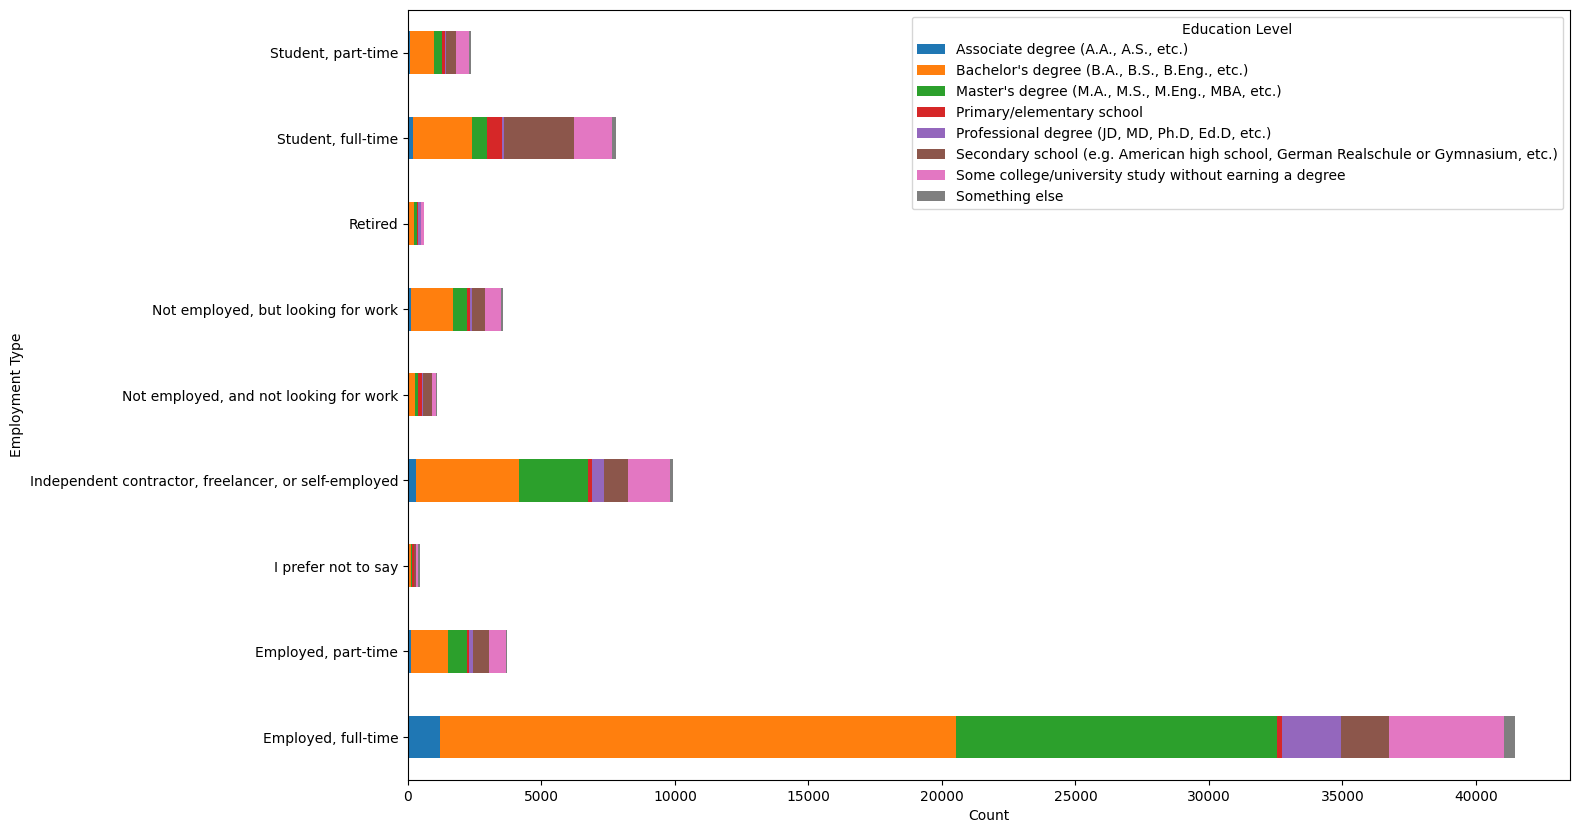

In [23]:
# Plot the stacked bar chart
Employ_Ed_crossT.plot(kind='barh', figsize=(15,10), stacked=True)
plt.legend(title='Education Level')
plt.ylabel('Employment Type')
plt.xlabel('Count')
plt.show()

This plot indicates that most respondents are are working full-time. A huge portion of full-time employees have bachelor's or master's degrees. 